<a href="https://colab.research.google.com/github/7kylor/7kylor/blob/main/cars_airplaines_classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [ ]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/TrainAI/Train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/TrainAI/Test'    # Update with your actual path

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/TrainAI/Train/cars')))
print(len(os.listdir('/content/drive/MyDrive/TrainAI/Train/airplanes')))
print(len(os.listdir('/content/drive/MyDrive/TrainAI/Test/cars')))
print(len(os.listdir('/content/drive/MyDrive/TrainAI/Train/airplanes')))

67
120
50
120


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 150 images belonging to 2 classes.
Found 37 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [ ]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
5/5 [==============================] - 35s 6s/step - loss: 1.7421 - accuracy: 0.5667 - val_loss: 0.4394 - val_accuracy: 0.8649
Epoch 2/30
5/5 [==============================] - 29s 6s/step - loss: 0.3890 - accuracy: 0.8933 - val_loss: 0.2236 - val_accuracy: 0.9730
Epoch 3/30
5/5 [==============================] - 30s 6s/step - loss: 0.1069 - accuracy: 0.9800 - val_loss: 0.0979 - val_accuracy: 0.9459
Epoch 4/30
5/5 [==============================] - 27s 6s/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 5/30
5/5 [==============================] - 26s 5s/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.4070 - val_accuracy: 0.8919
Epoch 6/30
5/5 [==============================] - 28s 6s/step - loss: 0.0874 - accuracy: 0.9733 - val_loss: 2.2783e-04 - val_accuracy: 1.0000
Epoch 7/30
5/5 [==============================] - 29s 6s/step - loss: 0.0172 - accuracy: 0.9933 - val_loss: 0.0812 - val_accuracy: 0.9730
Epoch 8/30
5/5 [==============

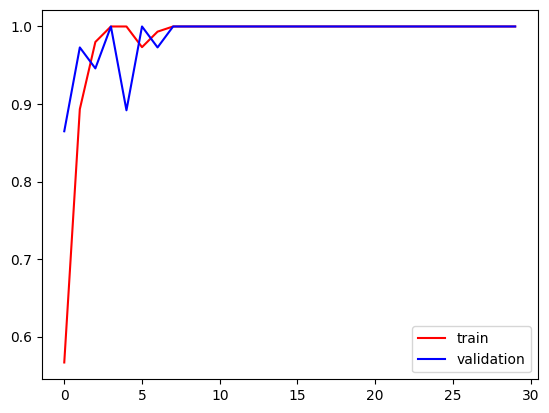

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

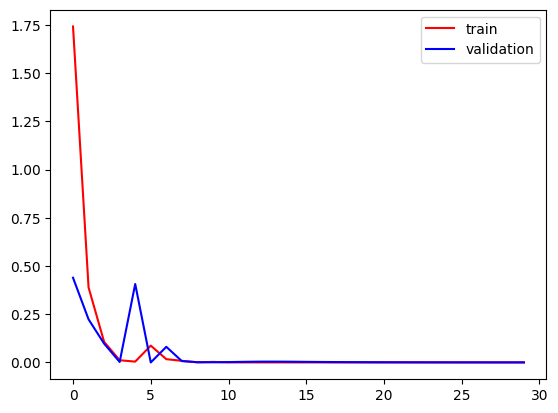

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 280 images belonging to 2 classes.


In [ ]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

9/9 [==============================] - 20s 2s/step
[[1.68245315e-05]
 [2.82136287e-04]
 [1.00000000e+00]
 [3.12800083e-04]
 [1.21347684e-05]
 [1.00000000e+00]
 [3.53042342e-05]
 [4.39368632e-05]
 [3.26384225e-07]
 [1.05159052e-05]
 [3.75113596e-05]
 [1.10566252e-04]
 [2.40416393e-05]
 [1.00000000e+00]
 [7.35096983e-05]
 [9.25324275e-05]
 [3.15526427e-06]
 [1.53899800e-05]
 [3.37659039e-05]
 [4.47330285e-06]
 [1.48571519e-06]
 [2.06702272e-03]
 [7.43712963e-06]
 [1.50668959e-04]
 [1.00000000e+00]
 [1.35230877e-07]
 [2.61240576e-08]
 [2.46163900e-03]
 [1.15454413e-05]
 [1.00000000e+00]
 [9.97953415e-01]
 [2.32983293e-05]
 [9.99676168e-01]
 [3.46888646e-06]
 [1.00000000e+00]
 [8.82605818e-05]
 [1.00000000e+00]
 [6.93326414e-01]
 [3.84024531e-02]
 [1.29960904e-06]
 [6.80823432e-05]
 [2.73936275e-05]
 [3.46643924e-06]
 [9.99999702e-01]
 [6.21502113e-04]
 [9.83665814e-06]
 [4.83653423e-07]
 [2.06888617e-05]
 [1.00000000e+00]
 [1.28627798e-05]
 [1.00000000e+00]
 [1.81071271e-04]
 [1.00000000e

In [ ]:
len(predictions)

280

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[189  41]
 [ 39  11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       230
           1       0.21      0.22      0.22        50

    accuracy                           0.71       280
   macro avg       0.52      0.52      0.52       280
weighted avg       0.72      0.71      0.72       280

